高斯判别分析是一种generative model。与判别模型不同的是，它计算的是P(X|y)与P(y)。  

它假定样本在给定标签值下的feature向量X服从高斯分布，标签值y服从伯努利分布。 

通过最大化X，y的联合分布似然（Joint likelihood)————这是一个关于$\mu_1 \mu_2 \Sigma \phi$的函数。

求解最值后发现各标签值下的向量X服从的高斯分布的均值即为同类样本的均值，协方差即为所有样本协方差的均值（默认各类别的协方差相同）。
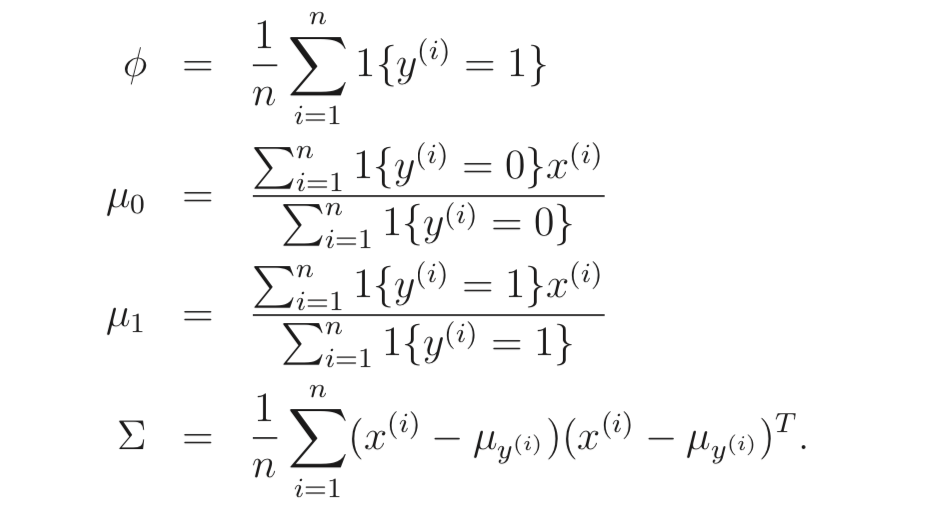
伯努利分布的$\phi$也即同类样本占所有样本的比例。

预测时利用贝叶斯公式计算$P(y|X)$,取概率最大的预测类别。

可以证明高斯判别分析本质上仍是logistic回归，但是预设条件更强（它假定样本在给定标签值下的feature向量X服从高斯分布，标签值y服从伯努利分布），所以在样本数量较少但确实符合预设条件的情况下效果更好。

In [2]:
import numpy as np


In [7]:
data=np.loadtxt("watermelon.csv",delimiter=",")
X=data[:,:-1]
X1=data[:8,:-1]
X2=data[8:,:-1]
y=data[:,-1]
print("positive data\n",X1)
print("negative data\n",X2)
print(y)

positive data
 [[1.    1.    1.    1.    1.    1.    0.697 0.46 ]
 [2.    1.    2.    1.    1.    1.    0.774 0.376]
 [2.    1.    1.    1.    1.    1.    0.634 0.264]
 [1.    1.    2.    1.    1.    1.    0.608 0.318]
 [3.    1.    1.    1.    1.    1.    0.556 0.215]
 [1.    2.    1.    1.    2.    2.    0.403 0.237]
 [2.    2.    1.    2.    2.    2.    0.481 0.149]
 [2.    2.    1.    1.    2.    1.    0.437 0.211]]
negative data
 [[2.    2.    2.    2.    2.    1.    0.666 0.091]
 [1.    3.    3.    1.    3.    2.    0.243 0.267]
 [3.    3.    3.    3.    3.    1.    0.245 0.057]
 [3.    1.    1.    3.    3.    2.    0.343 0.099]
 [1.    2.    1.    2.    1.    1.    0.639 0.161]
 [3.    2.    2.    2.    1.    1.    0.657 0.198]
 [2.    2.    1.    1.    2.    2.    0.36  0.37 ]
 [3.    1.    1.    3.    3.    1.    0.593 0.042]
 [1.    1.    2.    2.    2.    1.    0.719 0.103]]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


计算各类别的均值以及所有样本的协方差的均值

In [21]:
m=X.shape[0]
mu1=np.mean(X1,axis=0)
mu2=np.mean(X2,axis=0)
phi=X1.shape[0]/X.shape[0]
print(phi)
mu=np.mean(X,axis=0)
X_=X-mu
d=X_[0].size
cov=np.zeros((d,d))
for x in X_:
    cov+=(x[:,np.newaxis]@x[np.newaxis,:])
cov/=m
cov_inv=np.linalg.inv(cov)
print(cov_inv)

0.47058823529411764
[[ 2.80476887e+00  1.03383086e+00  2.17715818e-01 -1.78477066e+00
   1.03814905e+00  1.56633143e+00  1.04670559e+01  1.33612674e+00]
 [ 1.03383086e+00  6.40461312e+00 -2.62972189e+00 -3.03727383e-02
   2.33601042e+00 -3.58837973e-01  2.21185209e+01  1.17822777e+01]
 [ 2.17715818e-01 -2.62972189e+00  3.89222912e+00 -2.20274429e-01
  -1.97208321e+00  2.73229064e+00 -4.49595410e+00 -7.67569315e+00]
 [-1.78477066e+00 -3.03727383e-02 -2.20274429e-01  7.44939748e+00
  -2.93320730e+00 -5.29547358e-01 -1.10497638e+01  2.62689035e+01]
 [ 1.03814905e+00  2.33601042e+00 -1.97208321e+00 -2.93320730e+00
   8.23955374e+00 -2.51652389e+00  2.52596790e+01  1.42361635e+01]
 [ 1.56633143e+00 -3.58837973e-01  2.73229064e+00 -5.29547358e-01
  -2.51652389e+00  1.26077867e+01  1.92393403e+01 -1.43639730e+01]
 [ 1.04670559e+01  2.21185209e+01 -4.49595410e+00 -1.10497638e+01
   2.52596790e+01  1.92393403e+01  2.15554726e+02  3.01244902e+01]
 [ 1.33612674e+00  1.17822777e+01 -7.67569315e+00

In [ ]:
#compute p(X|y),i.e. the probability of X given y
def compute_p(x,y):
    if(y==0):
        p_y=1-phi
        p=np.exp(-(x-mu2)@cov_inv@(x-mu2)/2)
        return p*p_y
    else:
        p_y=phi
        p=np.exp(-(x-mu)@cov_inv@(x-mu2)/2)
        return p*p_y

In [ ]:
for t in X:
    p1=compute_p(t,1)